# HW3 Binary Classification (Due: Monday, February 19, 2024, 11:59 PM)

####❗Please submit this notebook (`.ipynb`) with your solutions. The solutions must include the **code**, **explanations** (e.g. *comments*, *figure title, axis labels, and legend*), and the **output of all the cells**. Submitting your solutions without them will lead to `a deduction of points`.

####❗Also, note that you should **cite all the references** you used under each question. Proper referencing is essential for academic integrity, giving credit to original authors, avoiding plagiarism, and providing a traceable path for verification. `Please check the course syllabus for more details about academic integrity`.

---

#### **Q0)** [[0 point]](https://) While you are allowed to discuss homework assignments, it is essential that you write down your code and solutions yourself. If you have discussed the homework with other students, please mention their names.


\##Your answer here

# Logistic Regression and Perceptron

####Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

#### **Q1**) [[5 points]](https://) Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [2]:
def sigmoid(x):
    
    # x: input data
    # y: sigmoid of 'x'
    # Sigmoid function: f(x) = 1 / (1 + e^(-x))

    y = 1/(1+np.exp(-x))
    return y


#### **Q2**) [[20 points]](https://) Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [3]:
#Your linear model from HW2
# Logistic regression model
def model(x, w):
    # Model function for linear regression.
    # x: Input data
    w: weights
    y = w[0] + w[1] * x
    # y: output predictions
    return y

#The logistic regression cross entropy cost
def cross_entropy(w,x,y):
    
    # w: array of weights
    # x: array of x's
    # y: array of y's

    epsilon = 1e-17
    # Get predictions using linear model
    xTw = model(x, w)
    # Apply sigmoid function to linear predictions
    sigmoid_x = sigmoid(xTw)
    # Calculate cost for class 1
    cost_1 = -y * np.log(epsilon + sigmoid_x)
    # Calculate cost for class 0
    cost_0 = (1 - y) * np.log(epsilon + 1 - sigmoid_x)
    # Combine the costs
    _cost = cost_1 - cost_0
    # Take the mean to get the total cost
    cost = np.mean(_cost)
    
    # returns float indicating total cost
    return cost


#### **Q3**) [[2 points]](https://) Run the code below to read a data file. Plot a scatter plot of x vs y.

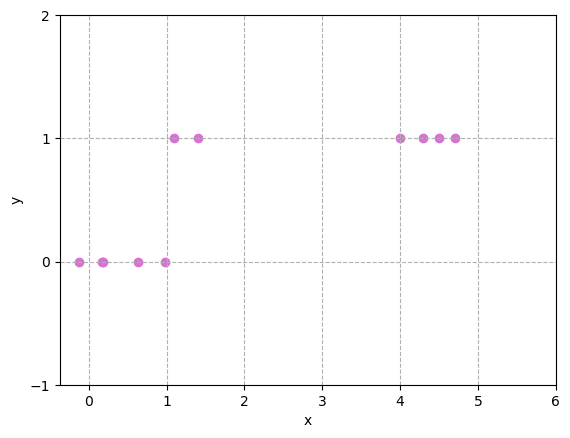

In [4]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

# Plot scatter plot of x vs y
plt.scatter(x, y, color='orchid')
plt.grid(linestyle="--")
# xy labels
plt.xlabel('x')
plt.ylabel('y')
# x range
plt.xticks(range(0, 7))
# y range
plt.yticks([-1, 0, 1, 2])
plt.show()

#### **Q4**) [[10 points]](https://) Copy the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to:
`max_its=3000, w=[3.0,3.0], alpha=0.1`.
#### Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [5]:
##gradient descent from HW2
def gradient_descent(g,alpha,max_its,w,x,y):
    
    # Initialize
    gradient = grad(g)

    weight_history = [w]
    cost_history = [g(w, x, y)]
    
    # Iterate
    for step in range(max_its):

        # Step
        w -= alpha * gradient(w, x, y)
        
        # Record
        # Cost history: List of costs corresponding to the weights
        cost_history.append(g(w, x, y))
        # Lists of weights
        weight_history.append(w)
        
    return weight_history, cost_history


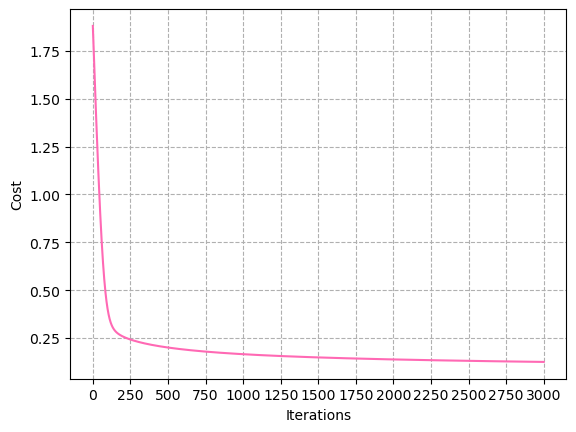

In [6]:
##Call the gradient_descent function here
##Plot the cost history here

# Parameters
max_its = 3000
w = np.array([3.0, 3.0])
alpha = 0.1

# Call gradient descent function
weights, costs = gradient_descent(cross_entropy, alpha, max_its, w, x, y)
steps = np.arange(max_its + 1)

# Plot cost history
plt.plot(steps, costs, color='hotpink')
plt.grid(linestyle="--")
# Labels
plt.xlabel('Iterations')
plt.ylabel('Cost')
# x range
plt.xticks(range(0, max_its + 2, 250))
plt.show()

#### **Q5**) [[10 points]](https://) Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [7]:
# Logistic regression classifier
def logistic_regression(learned_w,x):

    # Input: Learned weights, x
    positive_class_prob = sigmoid(model(x, learned_w))
    # Returns probability of positive class
    return positive_class_prob


#### **Q6**) [[5 points]](https://) Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q3.


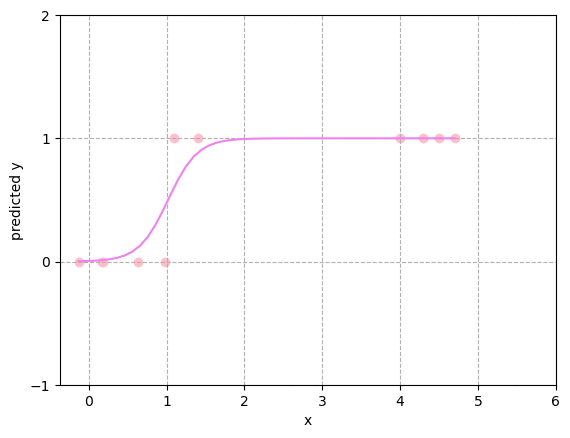

In [8]:
s = np.linspace(np.min(x),np.max(x))

#Your code here
learned_weights = weights[-1]
ys = logistic_regression(learned_weights, s)

plt.scatter(x, y, color='pink')
plt.plot(s, ys, color='violet')
plt.grid(linestyle="--")
plt.xlabel("x")
plt.ylabel("predicted y")
plt.xticks(range(0, 7))
plt.yticks([-1, 0, 1, 2])
plt.show()


#### **Q7**) [[10 points]](https://) Find the decision boundary of the logistic regression model using the learned weights from the last gradient descent run. Note that, since we have only one feature, the decision boundary will be a point. Utilize the linspace function to identify the x-value where the model's output is closest to 0.5.

In [9]:
# Generate values for s using linspace
s = np.linspace(np.min(x),np.max(x), 1000)
##Your code here

# Assuming weights is the last set of weights from the gradient descent
final_weights = weights[-1]

# Define the sigmoid function
def sigmoid(s):
    return 1.0 / (1.0 + np.exp(-s))

# Calculate the decision boundary
decision_boundary = -final_weights[0] / final_weights[1]

# Calculate the corresponding y values using the sigmoid function
y_values = sigmoid(final_weights[0] + final_weights[1] * s)

# Find the index where the sigmoid output is closest to 0.5
closest_index = np.argmin(np.abs(y_values - 0.5))

# The x-value at this index is the decision boundary
decision_boundary_x = s[closest_index]

# Print or use the decision boundary x-value as needed
print("Decision Boundary x-value:", decision_boundary_x)


Decision Boundary x-value: 1.021102406798222


#### **Q8**) [[5 points]](https://) Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [10]:
def logistic_regression_modified(learned_w,x, threshold):
    
    prediction = logistic_regression(learned_w, x)
    class_label: int = np.round(prediction - threshold + 0.5)
    # Predicted class: either 0 or 1
    return class_label


#### **Q9**) [[20 points]](https://) Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [11]:
def evaluate(y_actual,y_pred):

    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0
    correct = 0

    # Take in actual and predicted ys
    for (actual, predicted) in zip(y_actual[0], y_pred[0]):
        if actual == predicted:
            correct += 1

            if actual == 1:
                true_positive += 1
            else:
                true_negative += 1
    
        elif actual == 1:
            false_negative += 1
        else:
            false_positive += 1
    
    # change to percentage later
    accuracy = correct / len(y_actual[0])

    return false_positive, false_negative, true_positive, true_negative, accuracy

predictions = logistic_regression_modified(learned_weights, x, 0.5)
false_positive, false_negative, true_positive, true_negative, accuracy = evaluate(y, predictions)

# Print out all values
print(f"{false_positive = }")
print(f"{false_negative = }")
print(f"{true_positive = }")
print(f"{true_negative = }")
print(f"{accuracy = }")


false_positive = 0
false_negative = 0
true_positive = 6
true_negative = 5
accuracy = 1.0


#### **Q10**) [[20 points]](https://) Implement the perceptron cost function from the class (the smooth ReLU version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [12]:
def perceptron_cost(w, x, y):
    
    xTw = model(x, w)
    soft_s = np.log(1 + np.exp(-y * xTw))
    cost = np.mean(soft_s)
    
    return cost


#### **Q11**) [[10 points]](https://) Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to:
`max_its=3000, w=[3.0,3.0], alpha=0.1`
#### Save the cost and weight history returned by the gradient descent function. Plot the cost history. Note that for the perceptron, y values should be assigned as either -1 or 1.


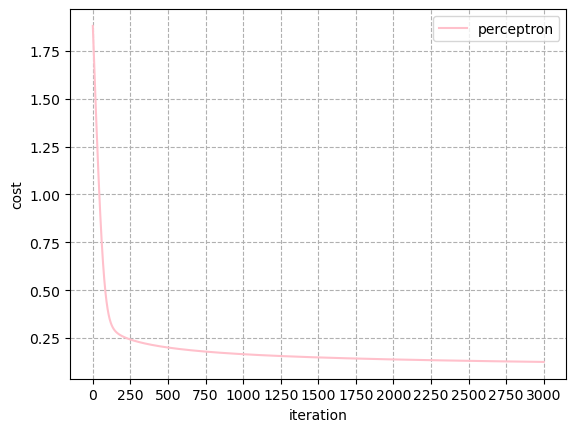

In [13]:
##Call the gradient_descent function here
##Plot the cost history here

max_its = 3000
w = np.array([3.0, 3.0])
alpha = 0.1

# create copy of ys for perceptron, replace 0 with -1
y_2 = y.copy()
y_2[y_2 == 0] = -1


# weights_cross_entropy, costs_cross_entropy = gradient_descent(cross_entropy, alpha, max_its, np.array([3.0, 3.0]), x, y)
weights_perceptron, costs_perceptron = gradient_descent(perceptron_cost, alpha, max_its, np.array([3.0, 3.0]), x, y_2)
steps = np.arange(max_its + 1)

# plt.plot(steps, costs_cross_entropy, color='cornflowerblue', label='cross entropy')
plt.plot(steps, costs_perceptron, color='pink', label='perceptron')
plt.grid(linestyle="--")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.xticks(range(0, max_its + 2, 250))
plt.legend()
plt.show()

#### **Q12**) [[10 points]](https://) Find the decision boundary of the perceptron model (i.e. tbe linear model from question 2) using the learned weights from the last gradient descent run. Note that, since we have only one feature, the decision boundary will be a point. Utilize the linspace function to identify the x-value where the model's output is closest to 0.

In [14]:
# Generate values for s using linspace
s = np.linspace(np.min(x),np.max(x), 1000)
##Your code here

# Assuming weights is the last set of weights from the gradient descent
final_weights_perceptron = weights[-1]

# Calculate decision boundary of perceptron model
decision_boundary_perceptron = -final_weights_perceptron[0] / final_weights_perceptron[1]

# x-value at the decision boundary is where the model's output is closest to 0
decision_boundary_x_perceptron = np.argmin(np.abs(s - decision_boundary_perceptron))

# Print
print("Decision Boundary x-value (Perceptron):", s[decision_boundary_x_perceptron])


Decision Boundary x-value (Perceptron): 1.021102406798222


#### **Q13**) [[5 points]](https://) Compare the two decision boundaries you found from Q7 and Q12. If they are similar (or dissimilar), provide your insights on why they appear alike (or different).

The two decision boundaries from Q7 and Q12 are the same. They are similar because in both cases, we are working with a linear decision boundary for a binary classification problem with a single feature.


# SKLearn

#### **Q14**) [[2 points]](https://)  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [15]:
##Your code here
import pandas as pd
csvname = 'heart.csv'
dataframe = pd.read_csv(csvname, delimiter = ',')
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### **Q15**) [[2 points]](https://) Use the data above to set y to be the "target" and X to be the remaining columns.

In [16]:
##Your code here
x = dataframe.drop("target", axis=1)
y = dataframe["target"]
print(x.head())
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


#### **Q16**) [[2 points]](https://) Run the code below to import the logistic regression and the train_test split functions from sklearn. Split your data into 80% train 20% test.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##Your code here
# Split data in 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("X train")
print(X_train.head())
print("y train")
print(y_train.head())
print("x test")
print(X_test.head())
print("y test")
print(y_test.head())


X train
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
y train
132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64
x test
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126    1        1      173      0      0.2   
246   

#### **Q17**) [[5 points]](https://) Use sklearn to fit a logistic regression model on your training set. Use all the default parameter. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [18]:
##Your code here
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/ivoryang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### **Q18**) [[5 points]](https://) Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [19]:
##Your code here
predictions = model.predict_proba(X_test)

print(predictions)


[[8.88374395e-01 1.11625605e-01]
 [2.12890600e-01 7.87109400e-01]
 [1.88662755e-01 8.11337245e-01]
 [9.75373596e-01 2.46264036e-02]
 [6.78255651e-02 9.32174435e-01]
 [9.06330004e-02 9.09367000e-01]
 [3.91949426e-01 6.08050574e-01]
 [9.98996183e-01 1.00381695e-03]
 [9.95544697e-01 4.45530303e-03]
 [4.52058244e-01 5.47941756e-01]
 [2.05367767e-01 7.94632233e-01]
 [9.31478410e-01 6.85215896e-02]
 [6.98014649e-02 9.30198535e-01]
 [9.79553964e-01 2.04460357e-02]
 [1.61879879e-02 9.83812012e-01]
 [4.47366116e-02 9.55263388e-01]
 [2.05009675e-02 9.79499032e-01]
 [9.52745448e-01 4.72545521e-02]
 [9.94281831e-01 5.71816881e-03]
 [9.90399653e-01 9.60034713e-03]
 [2.65698572e-01 7.34301428e-01]
 [9.90490372e-01 9.50962844e-03]
 [8.70220690e-01 1.29779310e-01]
 [1.97545481e-01 8.02454519e-01]
 [7.71098400e-02 9.22890160e-01]
 [3.30796538e-01 6.69203462e-01]
 [9.25167628e-02 9.07483237e-01]
 [3.08954833e-01 6.91045167e-01]
 [9.94266889e-01 5.73311056e-03]
 [8.52921408e-02 9.14707859e-01]
 [9.616298

#### **Q19**) [[2 points]](https://) Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. I.e., you should no longer have tuples.

In [20]:
##Your code here
predictions = predictions[:, 1]

print(predictions)


[1.11625605e-01 7.87109400e-01 8.11337245e-01 2.46264036e-02
 9.32174435e-01 9.09367000e-01 6.08050574e-01 1.00381695e-03
 4.45530303e-03 5.47941756e-01 7.94632233e-01 6.85215896e-02
 9.30198535e-01 2.04460357e-02 9.83812012e-01 9.55263388e-01
 9.79499032e-01 4.72545521e-02 5.71816881e-03 9.60034713e-03
 7.34301428e-01 9.50962844e-03 1.29779310e-01 8.02454519e-01
 9.22890160e-01 6.69203462e-01 9.07483237e-01 6.91045167e-01
 5.73311056e-03 9.14707859e-01 3.83701188e-02 2.72143350e-02
 5.00846940e-03 7.24541606e-02 6.92599711e-01 6.53737596e-02
 6.47886711e-01 8.77199288e-01 8.13627796e-01 8.60051146e-01
 5.13000564e-01 8.38062095e-01 8.16315487e-01 6.94778837e-01
 8.45686915e-01 4.80138300e-03 8.10608404e-01 9.55711383e-01
 6.90963236e-02 2.79566945e-02 5.90231931e-02 1.12097855e-02
 8.73302703e-01 9.79301270e-01 2.17333771e-01 5.29587068e-04
 4.02995090e-02 9.64868722e-01 9.34212593e-03 3.45779752e-03
 2.75438696e-02]


#### **Q20**) [[8 points]](https://) Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters). Also, print out the thresholds generated by the roc_curve function.

thresholds = array([           inf, 9.83812012e-01, 9.09367000e-01, 9.07483237e-01,
       8.11337245e-01, 8.10608404e-01, 7.94632233e-01, 7.87109400e-01,
       6.91045167e-01, 6.69203462e-01, 5.13000564e-01, 1.11625605e-01,
       7.24541606e-02, 6.90963236e-02, 6.85215896e-02, 4.02995090e-02,
       3.83701188e-02, 5.29587068e-04])


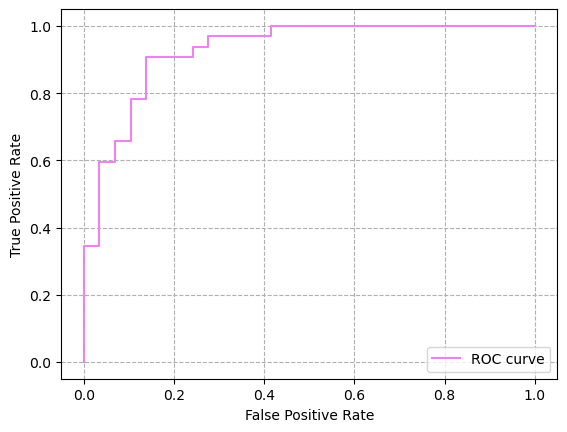

In [21]:
##Your code here
from sklearn.metrics import roc_curve

# Print thresholds generated by roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, predictions)
print(f"{thresholds = }")

# Plot ROC curve
plt.plot(fpr, tpr, color='violet', label='ROC curve')
plt.grid(linestyle="--")

# x and y labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Legend
plt.legend(loc="lower right")

plt.show()

#### **Q21**) [[2 points]](https://) Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score using the exact same setup as the last question.

In [22]:
##Your code here
from sklearn.metrics import roc_auc_score

# Report AUC Score
AUC = roc_auc_score(y_test, predictions)
print(f"{AUC = }")

AUC = 0.927801724137931
